# Assignment 7

### Speech recognition
This assignment is a simplified form of speech recognition. The languages are **artificial** and have been generated using a combination of Markov models and hidden Markov models (HMMs).

The dataset is presented with long sequences of symbols. For a total of 3000 symbols for each language, there are 30 files each with a string of 100 symbols. 

There are also 100 symbols in each of the 10 files to test where the idea is to classify them into one of the three languages.

bit.ly/castrogarciaassignment

### Language detection

There are three languages: A, B, and C. Each language uses the same set of symbols: A, o, e, t, p, g, and k. However, each language uses the symbols differently. In each of these languages we can model everything as P(next symbol | current symbol).

1. There is training data available for each language. This consists of several files each generated by sampling from a Markov model. Using python, build a Markov model for each of the languages.

2. Now use the Markov model and Bayes’ rule to classify the test cases. Write down how you used Bayes’ rule to get your classifier. Give the full posterior distribution for each test case.

Symbol dataset: https://course-resources.minerva.kgi.edu/uploaded_files/mke/ryDvKV/symbol.zip

In [1]:
# Importing relevant libraries
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
# These are the paths for the training files in my local laptop
# Each of these paths will be used for each language, to obtain the 30
# long strings of symbols that are part of the language.
train_langA = "/Users/dmstudent1/Projects/Assignment7/symbol/language-training-langA-"
train_langB = "/Users/dmstudent1/Projects/Assignment7/symbol/language-training-langB-"
train_langC = "/Users/dmstudent1/Projects/Assignment7/symbol/language-training-langC-"

To build a Markov model for each language:

- The function ```dist_lang``` helps find the initial distribution of the letters in the three languages.

- Then, find a transition matrix for the languages

In [3]:
def split(language):
    return [char for char in language]

def dist_lang(training):
    
    complete_lang = ''
    lang = []
    n = 30
    
    for i in range(n):
        filename = training + str(i)
        file = open(filename, "r")
        language = file.read()
        lang.append(language)
        complete_lang += lang[i]
    
    counts_lang = Counter(complete_lang)
    
    # it returns a tuple, where the [0] element is the counts
    # and the [1] element is the complete 3000 symbols
    return counts_lang, complete_lang

In [4]:
cnts_langA, cnts_langB, cnts_langC = dist_lang(train_langA), dist_lang(train_langB), dist_lang(train_langC)
# For now, we are only interested in the counts of each of the symbols in the languages
print(cnts_langA[0], '\n', cnts_langB[0], '\n', cnts_langC[0])

Counter({'t': 460, 'p': 446, 'g': 445, 'o': 419, 'e': 418, 'k': 409, 'A': 403}) 
 Counter({'e': 716, 'A': 672, 'o': 530, 't': 528, 'g': 457, 'p': 53, 'k': 44}) 
 Counter({'p': 453, 't': 443, 'g': 438, 'o': 436, 'e': 431, 'A': 428, 'k': 371})


In [5]:
def dist_prob(counters):
    
    all_probs = []
    n = 7
    
    for i in range(7):
        prob = round(list(counters[0].values())[i]/sum(counters[0].values()), 3)
        all_probs.append(prob)
        
    return (counters[0].keys(), all_probs)

In [6]:
print(dist_prob(cnts_langA), '\n', dist_prob(cnts_langB), '\n', dist_prob(cnts_langC))

(dict_keys(['k', 'A', 'p', 'o', 'e', 'g', 't']), [0.136, 0.134, 0.149, 0.14, 0.139, 0.148, 0.153]) 
 (dict_keys(['o', 'A', 't', 'g', 'e', 'k', 'p']), [0.177, 0.224, 0.176, 0.152, 0.239, 0.015, 0.018]) 
 (dict_keys(['p', 'o', 't', 'k', 'A', 'e', 'g']), [0.151, 0.145, 0.148, 0.124, 0.143, 0.144, 0.146])


In [7]:
ordered_chars = ['A', 'o', 'e', 't', 'p', 'g', 'k']
ordered_langA = [0.134, 0.140, 0.139, 0.153, 0.149, 0.148, 0.136]
ordered_langB = [0.224, 0.177, 0.239, 0.176, 0.018, 0.152, 0.015]
ordered_langC = [0.143, 0.145, 0.144, 0.148, 0.151, 0.146, 0.124]

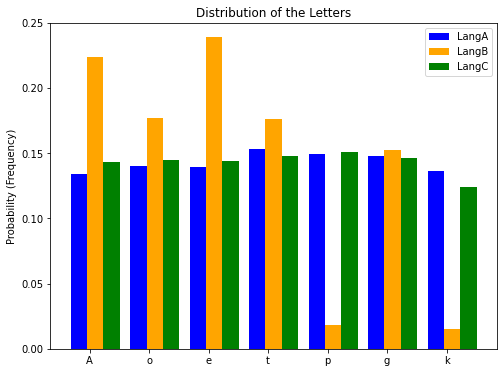

In [8]:
N = 7

# the x locations for the groups
ind = np.arange(0,2*N, 2)

 # the width of the bars
width = 0.55      

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, tuple(ordered_langA), width, color='blue')
rects2 = ax.bar(ind+width, tuple(ordered_langB), width, color='orange')
rects3 = ax.bar(ind+(2*width), tuple(ordered_langC), width, color='green')

ax.set_ylabel('Probability (Frequency)')
ax.set_title('Distribution of the Letters')
ax.set_xticks(ind + 2*width / 3)
ax.set_xticklabels( ('A', 'o', 'e', 't', 'p', 'g', 'k') )
ax.set_ylim(0, 0.250)

ax.legend( (rects1[0], rects2[0], rects3[0]), ('LangA', 'LangB', 'LangC') )

plt.show()

Interesting visualization of the distribution of the symbols throughout the languages. The "p" and "k" are used a lot less in LangB compared to the other two languages. The "A" and "e" are the most used in LangB and by a lot compared to the other languages. 

In [9]:
# List of all counts, was used more extensively in previous iterations of this code
all_cnts = [cnts_langA, cnts_langB, cnts_langC]

# Function to create transition matrix (count) and (probabilities)
def transitionMatrix(language):
    
    df = pd.DataFrame(split(language[1]))
        
    # create a new column with data shifted one space
    # the elements in the row represent the current symbol
    df['current'] = df[0].shift(-1)
        
    # add a count column (for group by function)
    # the element in the column represent the next symbol, 
    # the symbol the current will transition to
    df['next(current will transition to)'] = 1
        
    # groupby and then unstack, fill the zeros
    trans_mat = df.groupby([0, 'current']).count().unstack().fillna(0)
        
    # normalise by occurences and save values to get transition matrix
    normalized_mat = np.round(trans_mat.div(trans_mat.sum(axis=1), axis=0).values, 3)
        
    return trans_mat, normalized_mat

In [10]:
# Language A - Transition Matrix (Counts)
transitionMatrix(cnts_langA)[0]

next(current will transition to)                              
current                                A    e    g    k    o    p    t
0                                                                     
A                                      7   12   92   86   10   89  106
e                                     11    7  100   88   12  108   92
g                                    117  123   14   11  146   22   12
k                                    130  116   15   17  100   12   19
o                                      7   12  102   90    7   97  104
p                                    120  135   18    8  131   13   21
t                                     11   13  104  108   13  105  106

In [11]:
# Language A - Transition Matrix (Normalized/Probabilities)
transitionMatrix(cnts_langA)[1]

array([[0.017, 0.03 , 0.229, 0.214, 0.025, 0.221, 0.264],
       [0.026, 0.017, 0.239, 0.211, 0.029, 0.258, 0.22 ],
       [0.263, 0.276, 0.031, 0.025, 0.328, 0.049, 0.027],
       [0.318, 0.284, 0.037, 0.042, 0.244, 0.029, 0.046],
       [0.017, 0.029, 0.243, 0.215, 0.017, 0.232, 0.248],
       [0.269, 0.303, 0.04 , 0.018, 0.294, 0.029, 0.047],
       [0.024, 0.028, 0.226, 0.235, 0.028, 0.228, 0.23 ]])

In [12]:
# Language B - Transition Matrix (Counts)
transitionMatrix(cnts_langB)[0]

next(current will transition to)                                   \
current                                A      e      g     k      o     p   
0                                                                           
A                                   16.0   28.0  188.0  25.0  193.0  19.0   
e                                   16.0   22.0  181.0  16.0  224.0  27.0   
g                                  206.0  186.0   18.0   0.0   24.0   0.0   
k                                    2.0    1.0   12.0   1.0   11.0   4.0   
o                                  220.0  229.0   22.0   1.0   30.0   1.0   
p                                    2.0    3.0   16.0   1.0   17.0   1.0   
t                                  210.0  247.0   20.0   0.0   30.0   1.0   

                
current      t  
0               
A        202.0  
e        230.0  
g         23.0  
k         13.0  
o         27.0  
p         13.0  
t         20.0

In [13]:
# Columns are current, Rows are next (will transition)
# Language B - Transition Matrix (Normalized/Probabilities)
transitionMatrix(cnts_langB)[1]

array([[0.024, 0.042, 0.28 , 0.037, 0.288, 0.028, 0.301],
       [0.022, 0.031, 0.253, 0.022, 0.313, 0.038, 0.321],
       [0.451, 0.407, 0.039, 0.   , 0.053, 0.   , 0.05 ],
       [0.045, 0.023, 0.273, 0.023, 0.25 , 0.091, 0.295],
       [0.415, 0.432, 0.042, 0.002, 0.057, 0.002, 0.051],
       [0.038, 0.057, 0.302, 0.019, 0.321, 0.019, 0.245],
       [0.398, 0.468, 0.038, 0.   , 0.057, 0.002, 0.038]])

In [14]:
# Language C - Transition Matrix (Counts)
transitionMatrix(cnts_langC)[0]

next(current will transition to)                              
current                                A    e    g    k    o    p    t
0                                                                     
A                                    266   23   30   23   30   36   20
e                                     25  260   25   31   25   32   32
g                                     35   30  260   29   27   23   34
k                                     21   21   23  217   29   29   31
o                                     29   24   23   27  266   36   31
p                                     20   40   41   18   33  268   33
t                                     32   33   36   26   26   28  262

In [15]:
# Language C - Transition Matrix (Normalized/Probabilities)
transitionMatrix(cnts_langC)[1]

array([[0.621, 0.054, 0.07 , 0.054, 0.07 , 0.084, 0.047],
       [0.058, 0.605, 0.058, 0.072, 0.058, 0.074, 0.074],
       [0.08 , 0.068, 0.594, 0.066, 0.062, 0.053, 0.078],
       [0.057, 0.057, 0.062, 0.585, 0.078, 0.078, 0.084],
       [0.067, 0.055, 0.053, 0.062, 0.61 , 0.083, 0.071],
       [0.044, 0.088, 0.091, 0.04 , 0.073, 0.592, 0.073],
       [0.072, 0.074, 0.081, 0.059, 0.059, 0.063, 0.591]])

#### Classification

Classifing test case "Aoetpp" to determine whether it belongs to Language A, Language B, or Language C

We are interested in finding the probability of a language given a string, in other words, what is the probability of Language A, Language B, and Language C given ```"Aoetpp"```

```P(language = A|string = “Aoetpp”)```

```P(language = B|string = “Aoetpp”)```

```P(language = C|string = “Aoetpp”)```

#### Bayes Rule 

$$P(A|B) = \frac{P(B|A)*P(A)}{P(B)}$$

#### Calculations
P(string = “Aoetpp”|language = A) is the likelihood, the probability of a string given a certain language


To calculate the probability of markov model for language A, B, and C generating “Aoetpp” we get the:

- Initial distribution of the first letter "A" from each language
    - From ```ordered_langA```, ```ordered_langB```, and ```ordered_langC```, the initial distribution of the first letter "A" is ```0.134```, ```0.224```, and ```0.143``` respectively.


- Probabilities from the transition matrix for Language A
    - ```P("o"|"A")``` = ```0.025``` (element from row 1 column 5)
    - ```P("e"|"o")``` = ```0.029``` (element from row 5 column 2)
    - ```P("t"|"e")``` = ```0.220``` (element from row 2 column 7)
    - ```P("p"|"t")``` = ```0.228``` (element from row 7 column 6)
    - ```P("p"|"p")``` = ```0.029``` (element from row 6 column 6)

The probability of the markov model for language A

```P("Aoetpp"|A) = 0.134*0.025*0.029*0.220*0.228*0.029 = 1.4 x 10^-7```

- Probabilities from the transition matrix for Language B
    - ```P("o"|"A")``` = ```0.288``` (element from row 1 column 5)
    - ```P("e"|"o")``` = ```0.432``` (element from row 5 column 2)
    - ```P("t"|"e")``` = ```0.321``` (element from row 2 column 7)
    - ```P("p"|"t")``` = ```0.002``` (element from row 7 column 6)
    - ```P("p"|"p")``` = ```0.019``` (element from row 6 column 6)

The probability of the markov model for language B

```P("Aoetpp"|A) = 0.224*0.288*0.432*0.321*0.002*0.019 = 3.4 x 10^-7```

- Probabilities from the transition matrix for Language B
    - ```P("o"|"A")``` = ```0.070``` (element from row 1 column 5)
    - ```P("e"|"o")``` = ```0.055``` (element from row 5 column 2)
    - ```P("t"|"e")``` = ```0.740``` (element from row 2 column 7)
    - ```P("p"|"t")``` = ```0.063``` (element from row 7 column 6)
    - ```P("p"|"p")``` = ```0.592``` (element from row 6 column 6)

The probability of the markov model for language A

```P("Aoetpp"|A) = 0.143*0.070*0.055*0.740*0.063*0.592 = 1.5 x 10^-5```

Then, the prior probability we have about the probability of the language can be expressed as 

```P(language = A) = P(language = B) = P(language = C) = 0.33```

Finally, the posterior we are interested for every language would be the following;

```P(language|string) = P(string|language) * P(language)```


```P(“Aoetpp”|A) * P(A) = 1.4 x 10^-7 * 0.33 = 4.62 x 10^-8```

```P(“Aoetpp”|B) * P(B) = 3.4 x 10^-7 * 0.33 = 1.12 x 10^-7```

```P(“Aoetpp”|C) * P(C) = 1.5 x 10^-5 * 0.33 = 4.95 x 10^-6```

The language model with the highest probability is Language C for this string.

For this scenario, it was easy to see that it was Language C even before the posterior because the probability of the language is the same for all the three languages. We could have seen a difference if some languages were more common or rare than other in this scenario.

##### The Python implementation would do these calculations at a large scale for each of the test languages.

I wanted to make sure to understand the ins-and-outs but failed to implement python code for classification.

In [18]:
# For a python implementation, my first idea is to keep the following in a dictionary
# A	e	g	k	o	p	t

dict_lang = {"A":0, "e":1, "g":2, "k":3, "o":4, "p":5, "t":6}

# That will allow me to get the required row and column for the transition matrix based of the
# current letter and the letter that follows.

# From the transition matrices I have calculated already (above) and from 
# distribution of the letters in the languages, I could make calls to 
# the required numbers and find the probability for the test data.

In [17]:
from IPython.core.display import HTML
HTML("""
<style>

div.cell { /* Tunes the space between cells */
margin-top:1em;
margin-bottom:1em;
}

div.texxt_cell_render h1 { /* Main titles bigger, centered */
font-size: 2.2em;
line-height:1.4em;
text-align:center;
}

div.text_cell_render h2 { /* Parts names nearer from the text */
margin-bottom: -0.4em;
}


div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.25em;
line-height:1.4em;
padding-left:2em;
padding-right:2em;
}
</style>
"""
)